# Speed Dating insights

<img src = "https://c.tenor.com/9u6CCXYlPzEAAAAd/aum-tinder-match.gif">

What attributes influence the selection of a romantic partner?

# Overview
The dataset is taken from the [source](https://perso.telecom-paristech.fr/eagan/class/igr204/)

# Context

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>


# Exploring the data

In [89]:
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('SpeedDating.csv',encoding="ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


**Surely we have many null values, let's check them.**

In [91]:
data.shape

(8378, 195)

In [92]:
# checking for null values
pd.options.display.min_rows = len(data.columns)
data.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

So, there are a lot NaNs values, tons of them over many columns.<br>
There are **8,378 rows and a bunch of fields have thousands of NaNs** and probably bad practice to use imputation to guess the values.<br>
Instead, I'll just **disregard the fields with over 4000 null values** from the dataset. <br>
Let's have a look at some totals before we remove some fields and rows due to missing values.<br>

In [93]:
fig = px.histogram(data, x="age")
fig.show()

Clearly, people in age group 21-31 are active ones for dating.

In [94]:
# out of curiosity, let's see how many speed daters found a match!
pd.crosstab(index=data['match'],columns="count")

col_0,count
match,
0,6998
1,1380


About **20% of people found themselves a second date** after the speed dating session!

In [95]:
# getting percent of null values in all the columns to analyse and drop them accordingly 
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [96]:
columns_to_drop = missing_value_df[missing_value_df.percent_missing < 50]
print("These are the columns with more than 50% null values")
print(len(columns_to_drop['column_name']),"columns we need to drop are \n",(list(columns_to_drop['column_name'])))

These are the columns with more than 50% null values
136 columns we need to drop are 
 ['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', '

In [97]:
# Let's narrow the dataset now
temp_date = data.drop(columns_to_drop['column_name'], axis=1)
# temp_date = data.dropna()
temp_date.shape

(8378, 59)

- Clearly this isn't good idea, so after a peek at dataset we'll pick the columns manually.

In [98]:
# narrowing dataset
date = pd.concat([data.iloc[:, 0],
                  data.iloc[:, 2],
                  data.iloc[:, 11:28],
                  data.iloc[:, 30:35],
                  data.iloc[:, 39:43],
                  data.iloc[:, 45:67],
                  data.iloc[:, 69:74],
                  data.iloc[:, 87:91],
                  data.iloc[:, 97:102],
                  data.iloc[:, 104:107]],
                  axis=1)
date.shape

(8378, 67)

In [99]:
# removing nan values
date = date.dropna()
date.shape

(6797, 67)

In [100]:
date.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
30,4,0,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,...,9.0,7.0,0,4.0,10.0,8.0,5.0,6.0,7.0,2.0
31,4,0,12.0,0,-0.18,1,22.0,2.0,60.0,0.0,...,9.0,7.0,0,8.0,7.0,8.0,10.0,8.0,1.0,1.0
33,4,0,14.0,1,-0.18,1,23.0,2.0,30.0,5.0,...,9.0,7.0,1,8.0,10.0,7.0,10.0,8.0,10.0,1.0
34,4,0,15.0,0,0.21,0,24.0,3.0,30.0,10.0,...,9.0,7.0,0,6.0,9.0,8.0,9.0,7.0,7.0,2.0
35,4,0,16.0,0,0.37,1,25.0,2.0,50.0,0.0,...,9.0,7.0,0,5.0,10.0,8.0,4.0,4.0,3.0,2.0


<AxesSubplot:>

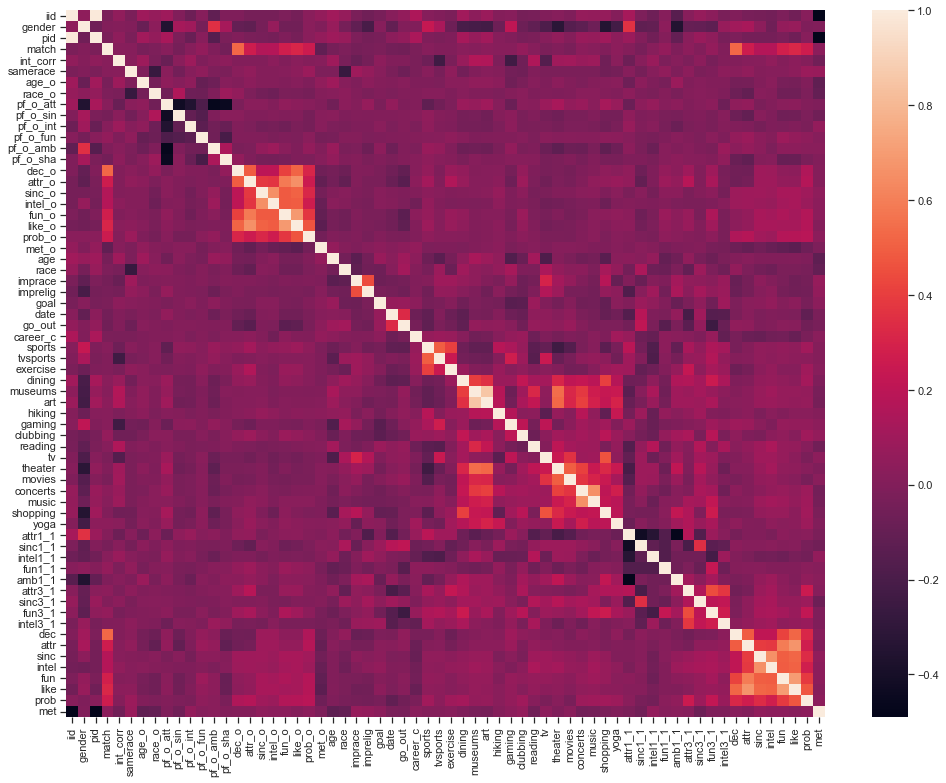

In [101]:
# heatmap

plt.subplots(figsize=(17,13))

ax.set_title("Correlation Heatmap")
corr = date.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Looking at heatmap, we can say - <br>
- Men (if gender = 1) seem to have a preference for the attractive partners (attr1_1) while women (gender = 0) seem to have a preference for ambitious partners (amb1_1)! <br>

- In other news, women like shopping and yoga and men like gaming, so at least we know this heatmap is working. Let's look into the interests some more! <br>

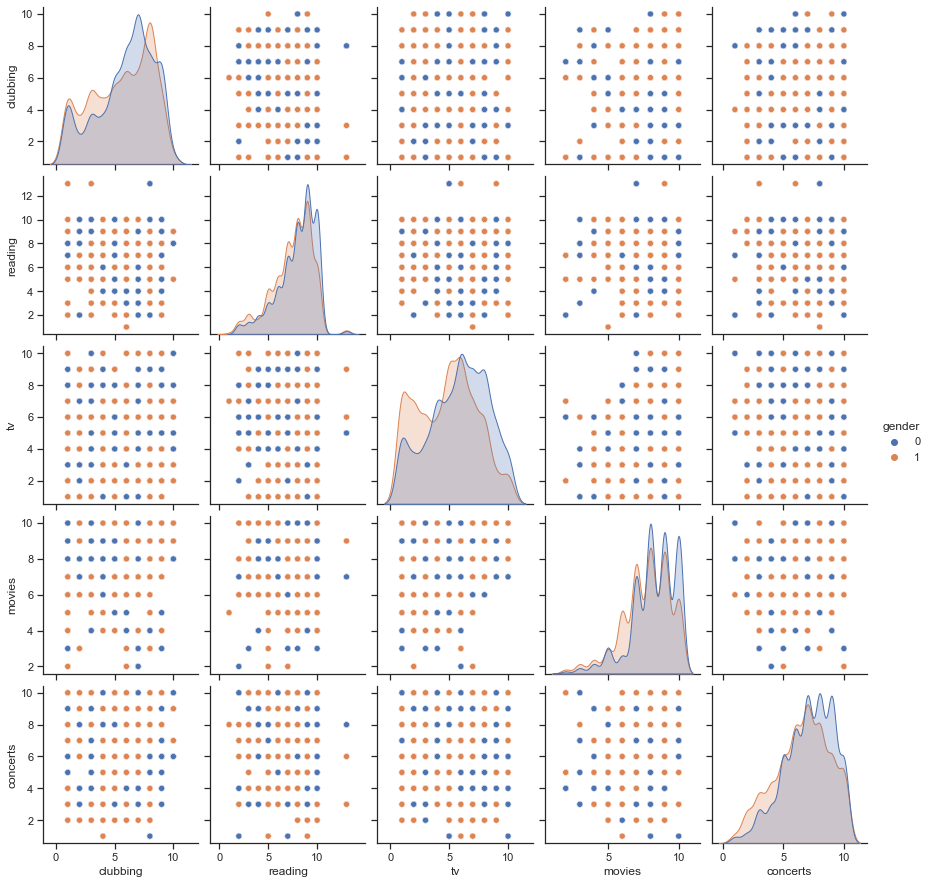

In [102]:
# looking at interest overlap

sns.set(style="ticks", color_codes=True)
date_int1 = pd.concat([date.iloc[:, 1], date.iloc[:, 41:44], date.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

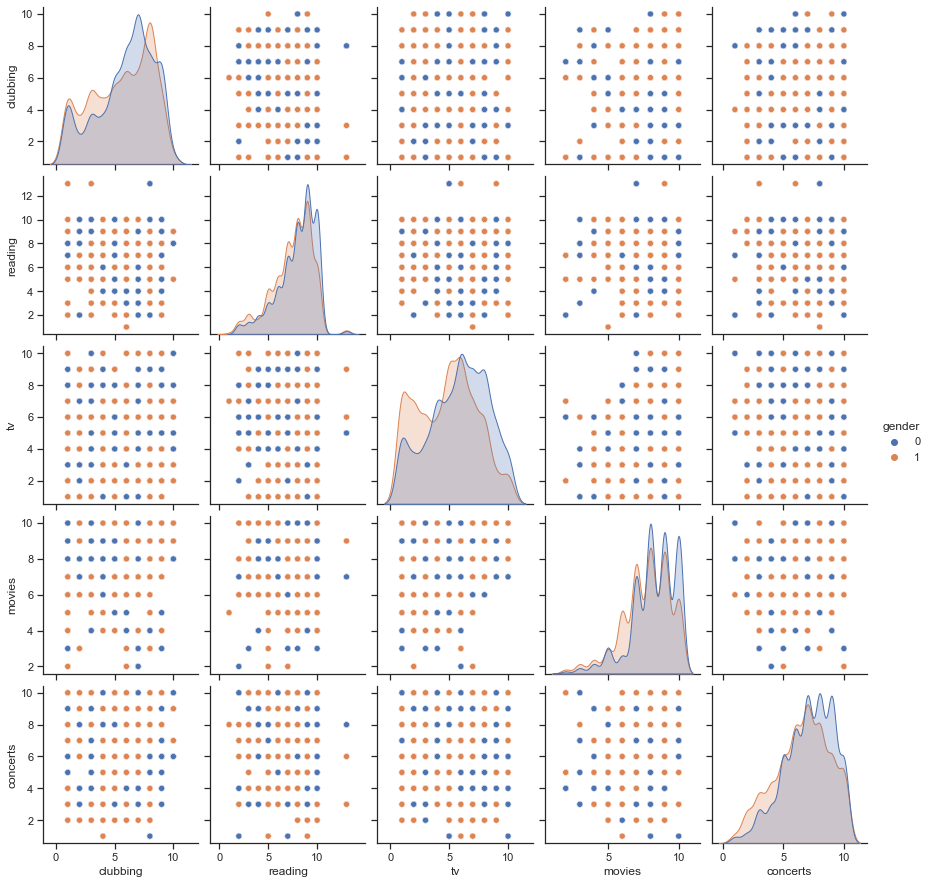

In [103]:
# looking at interest overlap

sns.set(style="ticks", color_codes=True)
date_int1 = pd.concat([date.iloc[:, 1], date.iloc[:, 41:44], date.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

In [104]:
# Let's skip interests for further insights
date_2 = date.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [105]:
# chi-square test
gender_crosstab = pd.crosstab(index=date_2.gender, columns=date_2.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

1.1102230246251565e-16

- Looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". 
- Men received about 2050 'no' and about 1300 'yes'. 
- So, men are more likely to be rejected by women than women are to be rejected by men. This is a statistically significant difference as confirmed by the above chi-squared test p-value. 

In [106]:
# unrequited love count

no_love_count = len(date_2[(date_2['dec_o']==0) & (date_2['dec']==1)]) 
+ len(date_2[(date_2['dec_o']==1) & (date_2['dec']==0)])
perc_broken_heart = no_love_count / len(date_2.index)
perc_broken_heart*100

26.040900397234072

It seems 26% of participants unfortunately had their heart broken. <br>
That's more than people who got a second date!